In [1]:
import wooldridge as wd
from arch import arch_model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox
from pmdarima import auto_arima
import statsmodels.api as sm
from scipy.stats import chi2
from statsmodels.regression.linear_model import OLS
from scipy.optimize import minimize

In [2]:
##Load data
intdef = wd.data('intdef')
intdef

,year,i3,inf,rec,out,def,i3_1,inf_1,def_1,ci3,cinf,cdef,y77
0,1948,1.04,8.1,16.200001,11.600000,-4.600000,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1949,1.10,-1.2,14.500000,14.300000,-0.200000,1.04,8.1,-4.600000,0.060000,-9.3,4.400001,0
2,1950,1.22,1.3,14.400000,15.600000,1.200001,1.10,-1.2,-0.200000,0.120000,2.5,1.400001,0
3,1951,1.55,7.9,16.100000,14.200000,-1.900001,1.22,1.3,1.200001,0.330000,6.6,-3.100001,0
4,1952,1.77,1.9,19.000000,19.400000,0.400000,1.55,7.9,-1.900001,0.220000,-6.0,2.300000,0
5,1953,1.93,0.8,18.700001,20.400000,1.699999,1.77,1.9,0.400000,0.160000,-1.1,1.299999,0
6,1954,0.95,0.7,18.500000,18.799999,0.299999,1.93,0.8,1.699999,-0.980000,-0.1,-1.400000,0
7,1955,1.75,-0.4,16.500000,17.299999,0.799999,0.95,0.7,0.299999,0.800000,-1.1,0.500000,0
8,1956,2.66,1.5,17.500000,16.500000,-1.000000,1.75,-0.4,0.799999,0.910000,1.9,-1.799999,0
9,1957,3.27,3.3,17.700001,17.000000,-0.700001,2.66,1.5,-1.000000,0.610000,1.8,0.299999,0


In [3]:
##ARCH(1) model
model = arch_model(intdef['i3'], vol='ARCH', p=1)
res = model.fit()
print(res.summary())

Iteration:      1,   Func. Count:      5,   Neg. LLF: 130.94000277361826
Iteration:      2,   Func. Count:     10,   Neg. LLF: 122.3727197228805
Iteration:      3,   Func. Count:     15,   Neg. LLF: 122.2557419760497
Iteration:      4,   Func. Count:     20,   Neg. LLF: 122.21513193816268
Iteration:      5,   Func. Count:     24,   Neg. LLF: 122.21374982177375
Iteration:      6,   Func. Count:     28,   Neg. LLF: 122.21371033849957
Iteration:      7,   Func. Count:     32,   Neg. LLF: 122.21370911352173
Iteration:      8,   Func. Count:     35,   Neg. LLF: 122.21370911651348
Optimization terminated successfully    (Exit mode 0)
            Current function value: 122.21370911352173
            Iterations: 8
            Function evaluations: 35
            Gradient evaluations: 8
                      Constant Mean - ARCH Model Results                      
Dep. Variable:                     i3   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squar

In [4]:
#GARCH(1,1) model
model = arch_model(intdef['i3'], vol='GARCH', p=1, q=1)
res = model.fit()
print(res.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 136.1395826789892
Iteration:      2,   Func. Count:     12,   Neg. LLF: 7553.465259229088
Iteration:      3,   Func. Count:     18,   Neg. LLF: 136.70557296383623
Iteration:      4,   Func. Count:     24,   Neg. LLF: 124.33691392297254
Iteration:      5,   Func. Count:     30,   Neg. LLF: 122.3830408453359
Iteration:      6,   Func. Count:     35,   Neg. LLF: 122.71164259681655
Iteration:      7,   Func. Count:     41,   Neg. LLF: 122.22550402835286
Iteration:      8,   Func. Count:     46,   Neg. LLF: 122.21385830757879
Iteration:      9,   Func. Count:     51,   Neg. LLF: 122.21370995923758
Iteration:     10,   Func. Count:     56,   Neg. LLF: 122.21370888353024
Iteration:     11,   Func. Count:     60,   Neg. LLF: 122.21370898528826
Optimization terminated successfully    (Exit mode 0)
            Current function value: 122.21370888353024
            Iterations: 11
            Function evaluations: 60
            Gradient evalua

In [5]:
##Correlogram
# GARCH model: conditional variance of the disturbances of the yt sequence constitutes an ARMA process

In [6]:
# Best ARMA model
y = intdef['i3']
model = auto_arima(
    y,
    start_p=0,  
    start_q=0,  
    max_p=5,   
    max_q=5,    
    d=0,        
    seasonal=False,  
    trace=True,  
    error_action='ignore',  
    suppress_warnings=True,  
    stepwise=True,  
    information_criterion='aic'  
)

print(model.summary())

residuals = model.resid()

#Squared residuals
squared_residuals = residuals**2

# Variance of the residuals
sample_variance = np.var(residuals, ddof=1) 
print(f"Variância amostral dos resíduos: {sample_variance}")

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=355.300, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=197.884, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=289.476, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=197.077, Time=0.02 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=194.104, Time=0.03 sec


c:\Users\daves\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\daves\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\daves\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\daves\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\daves\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\d

 ARIMA(4,0,0)(0,0,0)[0]             : AIC=195.917, Time=0.04 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=195.646, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=195.226, Time=0.05 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=197.364, Time=0.10 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=193.786, Time=0.05 sec

c:\Users\daves\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\daves\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\daves\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\daves\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=195.301, Time=0.03 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=195.733, Time=0.07 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=195.660, Time=0.10 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=194.196, Time=0.05 sec


c:\Users\daves\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\daves\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\daves\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\daves\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=197.027, Time=0.09 sec

Best model:  ARIMA(3,0,0)(0,0,0)[0] intercept
Total fit time: 0.771 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   56
Model:               SARIMAX(3, 0, 0)   Log Likelihood                 -91.893
Date:                Tue, 10 Jun 2025   AIC                            193.786
Time:                        16:43:11   BIC                            203.913
Sample:                             0   HQIC                           197.712
                                 - 56                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.4082      0.370      1.103      0.270      -0.317  

<Figure size 1000x600 with 0 Axes>

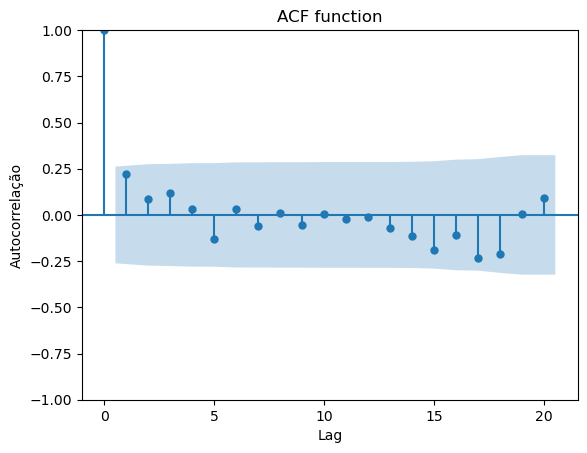

In [7]:
# Ploting correlogram
plt.figure(figsize=(10, 6))
plot_acf(squared_residuals, lags=20, alpha=0.05, title='ACF function')
plt.xlabel('Lag')
plt.ylabel('Autocorrelação')
plt.show()

In [8]:
# Ljung-Box test
lb_test = acorr_ljungbox(squared_residuals, lags=[10], return_df=True)
print(lb_test)

     lb_stat  lb_pvalue
10  5.912655   0.822547


In [9]:
##Mcleod and Li
#Regres the squared residual with q lags and calculate LM test

In [10]:
#Number of lags
q = 10

#Setting a dataframe
df = pd.DataFrame({'squared_residuals': squared_residuals})

# Adding squared residuals
for lag in range(1, q + 1):
    df[f'lag_{lag}'] = df['squared_residuals'].shift(lag)

# Remove missing values
df = df.dropna()

# Set independent and dependent variable

y = df['squared_residuals']
X = df[[f'lag_{i}' for i in range(1, q + 1)]]

# Regression
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      squared_residuals   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                 -0.065
Method:                 Least Squares   F-statistic:                    0.7254
Date:                Tue, 10 Jun 2025   Prob (F-statistic):              0.695
Time:                        16:43:11   Log-Likelihood:                -104.42
No. Observations:                  46   AIC:                             230.8
Df Residuals:                      35   BIC:                             251.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1856      0.706      1.679      0.1

In [11]:
#Mcleod and li statistic

n = len(y) ##observations

r_squared = results.rsquared

lm_stat = n * r_squared ##calculating statistic

alpha = 0.05 ##significance level

critical_value = chi2.ppf(1 - alpha, df=q) 

p_value = 1 - chi2.cdf(lm_stat, df=q)

print(f"Statistic (LM): {lm_stat}")
print(f"Critical value (χ²_{q}, α={alpha}): {critical_value}")
print(f"p-value: {p_value}")

# Interpretation
if lm_stat > critical_value:
    print("The null hypothesis is rejected: there is conditional heteroskedasticity.")
else:
    print("The null hypothesis is NOT rejected: there is  NO conditional heteroskedasticity.")

Statistic (LM): 7.897292367376994
Critical value (χ²_10, α=0.05): 18.307038053275146
p-value: 0.6388686572328914
The null hypothesis is NOT rejected: there is  NO conditional heteroskedasticity.


In [12]:
#ARCH-M model

In [13]:
#Load the data
data2 = wd.data('hprice1')
data2

,price,assess,bdrms,lotsize,sqrft,colonial,lprice,lassess,llotsize,lsqrft
0,300.0,349.100006,4,6126.0,2438,1,5.703783,5.855359,8.720297,7.798934
1,370.0,351.500000,3,9903.0,2076,1,5.913503,5.862210,9.200593,7.638198
2,191.0,217.699997,3,5200.0,1374,0,5.252274,5.383118,8.556414,7.225482
3,195.0,231.800003,3,4600.0,1448,1,5.273000,5.445875,8.433811,7.277938
4,373.0,319.100006,4,6095.0,2514,1,5.921578,5.765504,8.715224,7.829630
...,...,...,...,...,...,...,...,...,...,...
83,295.0,318.299988,3,6056.0,1837,1,5.686975,5.762994,8.708805,7.515889
84,236.0,259.399994,3,5828.0,1715,0,5.463832,5.558371,8.670429,7.447168
85,202.5,258.100006,3,6341.0,1574,0,5.310740,5.553347,8.754792,7.361375
86,219.0,232.000000,2,6362.0,1185,0,5.389072,5.446737,8.758098,7.077498


In [14]:
#Extract the data
price = pd.Series(data2['price'])
lotsize = pd.Series(data2['lotsize'])

In [15]:
# Fit an ARCH-M model
# Here, we assume that the mean of 'price' depends on its own conditional variance
arch_m_model = arch_model(price, mean='ARX', lags=0, vol='ARCH', p=1, dist='normal')

arch_m_results = arch_m_model.fit()

print(arch_m_results.summary())

Iteration:      1,   Func. Count:      5,   Neg. LLF: 532.2277424861413
Iteration:      2,   Func. Count:      8,   Neg. LLF: 532.2277428103741
Optimization terminated successfully    (Exit mode 0)
            Current function value: 532.2277424861413
            Iterations: 2
            Function evaluations: 8
            Gradient evaluations: 2
                           AR - ARCH Model Results                            
Dep. Variable:                  price   R-squared:                       0.000
Mean Model:                        AR   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -532.228
Distribution:                  Normal   AIC:                           1070.46
Method:            Maximum Likelihood   BIC:                           1077.89
                                        No. Observations:                   88
Date:                Tue, Jun 10 2025   Df Residuals:                       87
Time:             

c:\Users\daves\anaconda3\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 1.043e+04. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [16]:
#Assessing the fit
#SSR
residuals = arch_m_results.resid

ssr = np.sum(residuals**2)

print(f"Sum of Squared Residuals: {ssr}")

Sum of Squared Residuals: 917854.5452987101


In [17]:
#Comparing to a vol=GARCH
arch_m_model2 = arch_model(price, mean='ARX', lags=0, p=1, dist='normal')

arch_m_results2 = arch_m_model2.fit()

print(arch_m_results2.summary())

#SSR
residuals2 = arch_m_results2.resid

ssr2 = np.sum(residuals**2)

print(f"Sum of Squared Residuals: {ssr2}")

Iteration:      1,   Func. Count:      6,   Neg. LLF: 563.261807855821
Iteration:      2,   Func. Count:     12,   Neg. LLF: 531.4224465140848
Iteration:      3,   Func. Count:     17,   Neg. LLF: 531.4222676452918
Iteration:      4,   Func. Count:     22,   Neg. LLF: 531.4220627049029
Iteration:      5,   Func. Count:     27,   Neg. LLF: 531.4570118664141
Optimization terminated successfully    (Exit mode 0)
            Current function value: 531.4220627022942
            Iterations: 6
            Function evaluations: 31
            Gradient evaluations: 5
                           AR - GARCH Model Results                           
Dep. Variable:                  price   R-squared:                       0.000
Mean Model:                        AR   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -531.422
Distribution:                  Normal   AIC:                           1070.84
Method:            Maximum Likelihood  

c:\Users\daves\anaconda3\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 1.043e+04. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [18]:
# Perform Ljung-Box Q-test on squared residuals

# Compute squared residuals
res_sq1 = residuals**2 ## vector of squared residuals from vol = ARMA model
res_sq2 = residuals**2 ## vector of squared residuals from vol = GARCH model

lb_test1 = acorr_ljungbox(res_sq1, lags=[10], return_df=True)  # Test up to lag 10
print(lb_test1)

# Perform Ljung-Box Q-test on squared residuals
lb_test2 = acorr_ljungbox(res_sq2, lags=[10], return_df=True)  # Test up to lag 10
print(lb_test2)

     lb_stat  lb_pvalue
10  2.416325    0.99204
     lb_stat  lb_pvalue
10  2.416325    0.99204


In [19]:
#Diagnostich checks for model adequacy

In [20]:
#Ljung-Box test

# Extract standardized residuals
residuals = res.resid
squared_residuals = residuals**2

# Ljung-Box test on residuals
lb_test_residuals = acorr_ljungbox(residuals, lags=[10], return_df=True)
print("Ljung-Box test on residuals:")
print(lb_test_residuals)

# Ljung-Box test on squared residuals
lb_test_squared_residuals = acorr_ljungbox(squared_residuals, lags=[10], return_df=True)
print("\nLjung-Box test on squared residuals:")
print(lb_test_squared_residuals)

Ljung-Box test on residuals:
       lb_stat     lb_pvalue
10  157.977209  8.472276e-29

Ljung-Box test on squared residuals:
      lb_stat  lb_pvalue
10  42.879431   0.000005


In [21]:
##Future values of yt
#After Garch(1,1)
# Forecast future values

# Forecast the next 10 values
forecast_horizon = 10
forecasts = res.forecast(horizon=forecast_horizon)

# Extract the forecasted mean (conditional mean) and variance (conditional variance)
forecasted_mean = forecasts.mean.iloc[-1]  # Forecasted mean for the next 10 steps
forecasted_variance = forecasts.variance.iloc[-1]  # Forecasted variance for the next 10 steps

# Print the forecasted values
print("Forecasted Mean (Next 10 Steps):")
print(forecasted_mean)

print("\nForecasted Variance (Next 10 Steps):")
print(forecasted_variance)

Forecasted Mean (Next 10 Steps):
h.01    4.84505
h.02    4.84505
h.03    4.84505
h.04    4.84505
h.05    4.84505
h.06    4.84505
h.07    4.84505
h.08    4.84505
h.09    4.84505
h.10    4.84505
Name: 55, dtype: float64

Forecasted Variance (Next 10 Steps):
h.01    15.573149
h.02    16.515288
h.03    17.457427
h.04    18.399566
h.05    19.341705
h.06    20.283844
h.07    21.225983
h.08    22.168122
h.09    23.110261
h.10    24.052400
Name: 55, dtype: float64


In [22]:
##Other nmodels of conditional variance

In [23]:
##IGARCH
# Specify the IGARCH(1,1) model
model_igarch = arch_model(intdef['i3'], vol='GARCH', p=1, q=1, o=0, mean='Constant', rescale=False)

# Set IGARCH constraint
# This is the key part - we tell the model that alpha + beta should equal 1
# For GARCH(1,1), the parameters are [omega, alpha, beta]
model_igarch.volatility.constraint = lambda params: params[1] + params[2] - 1.0

# Fit the model
res_igarch = model_igarch.fit()

# Print the summary of the model
print(res_igarch.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 136.1395826789892
Iteration:      2,   Func. Count:     12,   Neg. LLF: 7553.465259229088
Iteration:      3,   Func. Count:     18,   Neg. LLF: 136.70557296383623
Iteration:      4,   Func. Count:     24,   Neg. LLF: 124.33691392297254
Iteration:      5,   Func. Count:     30,   Neg. LLF: 122.3830408453359
Iteration:      6,   Func. Count:     35,   Neg. LLF: 122.71164259681655
Iteration:      7,   Func. Count:     41,   Neg. LLF: 122.22550402835286
Iteration:      8,   Func. Count:     46,   Neg. LLF: 122.21385830757879
Iteration:      9,   Func. Count:     51,   Neg. LLF: 122.21370995923758
Iteration:     10,   Func. Count:     56,   Neg. LLF: 122.21370888353024
Iteration:     11,   Func. Count:     60,   Neg. LLF: 122.21370898528826
Optimization terminated successfully    (Exit mode 0)
            Current function value: 122.21370888353024
            Iterations: 11
            Function evaluations: 60
            Gradient evalua

In [24]:
##Models with explanatory variables
intdef['dummy'] = (intdef['year'] > 1993).astype(int)

# with column names for proper interpretation in the results
X = pd.DataFrame(intdef['dummy'])

# Use the X parameter (not x) to include exogenous variables in the mean equation
model_exp = arch_model(intdef['i3'], x=X, mean='LS', vol='GARCH', p=1, q=1)
res_exp = model_exp.fit(disp='off')  # Set disp='off' to reduce verbose output
print(res_exp.summary())


                     Least Squares - GARCH Model Results                      
Dep. Variable:                     i3   R-squared:                      -0.542
Mean Model:             Least Squares   Adj. R-squared:                 -0.571
Vol Model:                      GARCH   Log-Likelihood:               -118.839
Distribution:                  Normal   AIC:                           247.678
Method:            Maximum Likelihood   BIC:                           257.805
                                        No. Observations:                   56
Date:                Tue, Jun 10 2025   Df Residuals:                       54
Time:                        16:43:11   Df Model:                            2
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
Const          2.7660      0.118     23.379 7.056e-121 [  2.534,  2.99

In [25]:
##Models with assymetry

In [26]:
##TARCH model
#Preparing the data
# Load the dataset
data = wd.data('hprice1')

# Calculate percentage changes (returns) in house prices
data['returns'] = data['price'].pct_change().dropna()

# Drop the first row which contains NaN due to the pct_change operation
data = data.dropna()

# Fit the TARCH model (GJR-GARCH)
# The `vol='GARCH'` parameter specifies the GARCH model, and `p=1, o=1, q=1` specifies the order of the model.
# The `o=1` parameter allows for asymmetric effects (TARCH/GJR-GARCH).
model = arch_model(data['returns'], vol='Garch', p=1, o=1, q=1)
results = model.fit(update_freq=5)

# Display the summary of the model
print(results.summary())

Iteration:      5,   Func. Count:     40,   Neg. LLF: 54.79354371713068
Iteration:     10,   Func. Count:     71,   Neg. LLF: 54.77156395912378
Optimization terminated successfully    (Exit mode 0)
            Current function value: 54.77156400104625
            Iterations: 10
            Function evaluations: 71
            Gradient evaluations: 10
                   Constant Mean - GJR-GARCH Model Results                    
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:               -54.7716
Distribution:                  Normal   AIC:                           119.543
Method:            Maximum Likelihood   BIC:                           131.873
                                        No. Observations:                   87
Date:                Tue, Jun 10 2025   Df Residuals:                       86
Time:          

In [27]:
##EGARCH model
# Fit the EGARCH model
# The `vol='EGARCH'` parameter specifies the Exponential GARCH model
# p=1, o=1, q=1 specifies the order of the model with asymmetric effects
egarch_model = arch_model(data['returns'], vol='EGARCH', p=1, o=1, q=1)
egarch_results = egarch_model.fit(update_freq=5)

# Display the summary of the model
print(egarch_results.summary())

Iteration:      5,   Func. Count:     45,   Neg. LLF: 733703268482.5905
Iteration:     10,   Func. Count:     88,   Neg. LLF: 58.73319032470346
Iteration:     15,   Func. Count:    123,   Neg. LLF: 114131593.59848584
Iteration:     20,   Func. Count:    163,   Neg. LLF: 53615986.5867397
Iteration:     25,   Func. Count:    203,   Neg. LLF: 544.9209076519791
Iteration:     30,   Func. Count:    252,   Neg. LLF: 7638943575.917934
Iteration:     35,   Func. Count:    299,   Neg. LLF: 73159103.75039847
Iteration:     40,   Func. Count:    354,   Neg. LLF: 1281595309.1340709
Iteration:     45,   Func. Count:    401,   Neg. LLF: 42.91576272057816
Iteration:     50,   Func. Count:    439,   Neg. LLF: 4723615.5789498715
Iteration:     55,   Func. Count:    492,   Neg. LLF: 25609898.405331247
Iteration:     60,   Func. Count:    551,   Neg. LLF: 26351143.836617965
Iteration:     65,   Func. Count:    613,   Neg. LLF: 27090436.782042835
Iteration:     70,   Func. Count:    686,   Neg. LLF: 95.46

c:\Users\daves\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


In [28]:
##Testing for leverage effects

In [29]:
# Fit a standard GARCH(1,1) model
garch_model = arch_model(data['returns'], vol='GARCH', p=1, q=1)
garch_results = garch_model.fit(update_freq=5)

# Print the summary
print(garch_results.summary())

Iteration:      5,   Func. Count:     37,   Neg. LLF: 54.97588561855231
Iteration:     10,   Func. Count:     62,   Neg. LLF: 60.32165994767513
Optimization terminated successfully    (Exit mode 0)
            Current function value: 54.869762636824035
            Iterations: 11
            Function evaluations: 66
            Gradient evaluations: 10
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -54.8698
Distribution:                  Normal   AIC:                           117.740
Method:            Maximum Likelihood   BIC:                           127.603
                                        No. Observations:                   87
Date:                Tue, Jun 10 2025   Df Residuals:                       86
Time:         

In [30]:
# Get residuals and conditional variances
residuals = garch_results.resid
conditional_variances = garch_results.conditional_volatility ** 2

# Calculate standardized residuals
standardized_residuals = residuals / np.sqrt(conditional_variances)

# Add standardized residuals to the original DataFrame
data['standardized_residuals'] = standardized_residuals
data['squared_standardized_residuals'] = standardized_residuals ** 2

In [31]:
#Create Lagged Variables
# Number of lags to include
lags = 2

# Create lagged variables
for i in range(1, lags + 1):
    data[f's_lag_{i}'] = data['standardized_residuals'].shift(i)

# Drop rows with NaN values (due to shifting)
data_cleaned = data.dropna()

In [32]:
#Regression of Standardized Residuals

# Define dependent and independent variables
X = data_cleaned[[f's_lag_{i}' for i in range(1, lags + 1)]]
X = sm.add_constant(X)  # Add a constant term
y = data_cleaned['squared_standardized_residuals']

# Fit the regression model
model = sm.OLS(y, X)
results = model.fit()

# Print regression results
print(results.summary())

                                  OLS Regression Results                                  
Dep. Variable:     squared_standardized_residuals   R-squared:                       0.005
Model:                                        OLS   Adj. R-squared:                 -0.019
Method:                             Least Squares   F-statistic:                    0.2164
Date:                            Tue, 10 Jun 2025   Prob (F-statistic):              0.806
Time:                                    16:43:11   Log-Likelihood:                -193.17
No. Observations:                              85   AIC:                             392.3
Df Residuals:                                  82   BIC:                             399.7
Df Model:                                       2                                         
Covariance Type:                        nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------

In [33]:
##Sign Bias Test
# Create dummy variable for negative shocks
data_cleaned['d_lag_1'] = (data_cleaned['standardized_residuals'].shift(1) < 0).astype(int)

# Define dependent and independent variables for Sign Bias test
X_sign_bias = data_cleaned[['d_lag_1']]
X_sign_bias = sm.add_constant(X_sign_bias)  # Add a constant term
y_sign_bias = data_cleaned['squared_standardized_residuals']

# Fit the regression model for Sign Bias test
model_sign_bias = sm.OLS(y_sign_bias, X_sign_bias)
results_sign_bias = model_sign_bias.fit()

# Print regression results
print(results_sign_bias.summary())

                                  OLS Regression Results                                  
Dep. Variable:     squared_standardized_residuals   R-squared:                       0.020
Model:                                        OLS   Adj. R-squared:                  0.009
Method:                             Least Squares   F-statistic:                     1.727
Date:                            Tue, 10 Jun 2025   Prob (F-statistic):              0.192
Time:                                    16:43:11   Log-Likelihood:                -192.52
No. Observations:                              85   AIC:                             389.0
Df Residuals:                                  83   BIC:                             393.9
Df Model:                                       1                                         
Covariance Type:                        nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------

C:\Users\daves\AppData\Local\Temp\ipykernel_20824\3349678867.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['d_lag_1'] = (data_cleaned['standardized_residuals'].shift(1) < 0).astype(int)


In [34]:
##Generalized Sign Bias Test
# Create interaction terms
data_cleaned['d_lag_1_s_lag_1'] = data_cleaned['d_lag_1'] * data_cleaned['s_lag_1']
data_cleaned['(1-d_lag_1)_s_lag_1'] = (1 - data_cleaned['d_lag_1']) * data_cleaned['s_lag_1']

# Define dependent and independent variables for Generalized Sign Bias test
X_gen_sign_bias = data_cleaned[['d_lag_1', 'd_lag_1_s_lag_1', '(1-d_lag_1)_s_lag_1']]
X_gen_sign_bias = sm.add_constant(X_gen_sign_bias)  # Add a constant term
y_gen_sign_bias = data_cleaned['squared_standardized_residuals']

# Fit the regression model for Generalized Sign Bias test
model_gen_sign_bias = sm.OLS(y_gen_sign_bias, X_gen_sign_bias)
results_gen_sign_bias = model_gen_sign_bias.fit()

# Print regression results
print(results_gen_sign_bias.summary())

                                  OLS Regression Results                                  
Dep. Variable:     squared_standardized_residuals   R-squared:                       0.022
Model:                                        OLS   Adj. R-squared:                 -0.014
Method:                             Least Squares   F-statistic:                    0.6198
Date:                            Tue, 10 Jun 2025   Prob (F-statistic):              0.604
Time:                                    16:43:11   Log-Likelihood:                -192.43
No. Observations:                              85   AIC:                             392.9
Df Residuals:                                  81   BIC:                             402.6
Df Model:                                       3                                         
Covariance Type:                        nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
--

C:\Users\daves\AppData\Local\Temp\ipykernel_20824\3175469283.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['d_lag_1_s_lag_1'] = data_cleaned['d_lag_1'] * data_cleaned['s_lag_1']
C:\Users\daves\AppData\Local\Temp\ipykernel_20824\3175469283.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['(1-d_lag_1)_s_lag_1'] = (1 - data_cleaned['d_lag_1']) * data_cleaned['s_lag_1']


In [35]:
##Nonnormal errors
#with a t-distribution
# Fit a GARCH(1,1) model with Student's t-distribution
garch_model = arch_model(data['returns'], vol='GARCH', p=1, q=1, dist='t')
garch_results = garch_model.fit(update_freq=5)

# Print the summary
print(garch_results.summary())

Iteration:      5,   Func. Count:     37,   Neg. LLF: 100.70694079257935
Iteration:     10,   Func. Count:     69,   Neg. LLF: 45.303333698263366
Iteration:     15,   Func. Count:     99,   Neg. LLF: 45.19773762243316
Iteration:     20,   Func. Count:    129,   Neg. LLF: 45.15953296176247
Optimization terminated successfully    (Exit mode 0)
            Current function value: 45.1595075510256
            Iterations: 22
            Function evaluations: 141
            Gradient evaluations: 22
                        Constant Mean - GARCH Model Results                         
Dep. Variable:                      returns   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -45.1595
Distribution:      Standardized Student's t   AIC:                           100.319
Method:                  Maximum Likelihood   BIC:                          

In [36]:
##Multivariated GARCH

In [37]:
##VECH Model

# Preparing the data
# Calculate percentage changes (returns) for the variables
data['returns'] = data['price'].pct_change().dropna()
data['returns2'] = data['assess'].pct_change().dropna()

# Drop rows with missing values
data = data.dropna()

# Prepare the returns data for multivariate GARCH
returns = data[['returns', 'returns2']]

# Number of assets
n = returns.shape[1]

# Step 1: Estimate univariate GARCH models for each return series
garch_models = []
for i in range(n):
    model = arch_model(returns.iloc[:, i], vol='GARCH', p=1, q=1)
    result = model.fit(disp='off')
    garch_models.append(result)
    print(f"\nGARCH Model for {returns.columns[i]}:")
    print(result.summary().tables[0])

# Step 2: Implement the VECH model using MLE

# Compute unconditional correlation matrix
corr_const = np.corrcoef(returns.values.T)
print("\nUnconditional Correlation Matrix:")
print(corr_const)

# Define the negative log-likelihood function
def negative_log_likelihood(params, returns_array, corr_const):
    """
    Negative log-likelihood function for the VECH model.
    """
    T, n = returns_array.shape
    A = params[:n**2].reshape((n, n))  # ARCH effects
    B = params[n**2:2*n**2].reshape((n, n))  # GARCH effects
    C = (1 - A - B) * corr_const  # Constant term

    H = np.zeros((T, n, n))  # Conditional covariance matrices
    H[0] = corr_const.copy()

    log_likelihood = 0
    for t in range(1, T):
        eps_t = returns_array[t-1].reshape(-1, 1)
        eps_eps_t = np.dot(eps_t, eps_t.T)  # Cross-product of residuals

        # VECH recursion
        H[t] = C + A * eps_eps_t + B * H[t-1]

        # Ensure positive definiteness
        eigvals = np.linalg.eigvalsh(H[t])
        if np.min(eigvals) <= 0:
            H[t] = H[t] - np.min(eigvals) * np.eye(n) + 0.0001 * np.eye(n)

        # Compute log-likelihood
        inv_H_t = np.linalg.inv(H[t])
        det_H_t = np.linalg.det(H[t])
        log_likelihood += -0.5 * (np.log(det_H_t) + np.dot(returns_array[t], np.dot(inv_H_t, returns_array[t])))

    return -log_likelihood  # Return negative log-likelihood for minimization

# Initial parameter guesses
n_params = 2 * n**2  # Number of parameters (A and B)
initial_params = np.random.rand(n_params) * 0.1  # Small random values

# Optimize the likelihood function
result = minimize(
    negative_log_likelihood,
    initial_params,
    args=(returns.values, corr_const),
    method='L-BFGS-B',  # Use a constrained optimization method
    bounds=[(0, 1)] * n_params  # Ensure parameters are between 0 and 1
)

# Extract optimized parameters
optimized_params = result.x
A_opt = optimized_params[:n**2].reshape((n, n))
B_opt = optimized_params[n**2:2*n**2].reshape((n, n))
C_opt = (1 - A_opt - B_opt) * corr_const

print("\nOptimized Parameters:")
print("A (ARCH effects):")
print(A_opt)
print("B (GARCH effects):")
print(B_opt)
print("C (Constant term):")
print(C_opt)

# Step 3: Estimate the VECH model with optimized parameters
T = returns.shape[0]  # Ensure T is correctly calculated
H = np.zeros((T, n, n))  # Conditional covariance matrices
H[0] = corr_const.copy()

for t in range(1, T):
    eps_t = returns.values[t-1].reshape(-1, 1)  # Access t-1, which is valid
    eps_eps_t = np.dot(eps_t, eps_t.T)  # Cross-product of residuals

    # VECH recursion with optimized parameters
    H[t] = C_opt + A_opt * eps_eps_t + B_opt * H[t-1]

    # Ensure positive definiteness
    eigvals = np.linalg.eigvalsh(H[t])
    if np.min(eigvals) <= 0:
        H[t] = H[t] - np.min(eigvals) * np.eye(n) + 0.0001 * np.eye(n)

print("\nVECH Model Results with MLE:")
print("Last few conditional covariance matrices:")
for t in range(T-5, T):
    print(f"Time {t}:")
    print(H[t])

# Generate conditional volatility forecasts
forecast_horizon = 5
H_forecast = np.zeros((forecast_horizon, n, n))
H_forecast[0] = H[-1]

for h in range(1, forecast_horizon):
    H_forecast[h] = C_opt + B_opt * H_forecast[h-1]

print("\nForecasted Covariance Matrices:")
for h in range(forecast_horizon):
    print(f"Horizon {h+1}:")
    print(H_forecast[h])


GARCH Model for returns:
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -53.6933
Distribution:                  Normal   AIC:                           115.387
Method:            Maximum Likelihood   BIC:                           125.157
                                        No. Observations:                   85
Date:                Tue, Jun 10 2025   Df Residuals:                       84
Time:                        16:43:12   Df Model:                            1

GARCH Model for returns2:
                     Constant Mean - GARCH Model Results                      
Dep. Variable:               returns2   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000

C:\Users\daves\AppData\Local\Temp\ipykernel_20824\2864482105.py:62: RuntimeWarning: invalid value encountered in log
  log_likelihood += -0.5 * (np.log(det_H_t) + np.dot(returns_array[t], np.dot(inv_H_t, returns_array[t])))


In [38]:
##Diagonal VECh Model

# Preparing the data
# Calculate percentage changes (returns) for the variables
data['returns'] = data['price'].pct_change().dropna()
data['returns2'] = data['assess'].pct_change().dropna()

# Drop rows with missing values
data = data.dropna()

# Prepare the returns data for multivariate GARCH
returns = data[['returns', 'returns2']]

# Number of assets
n = returns.shape[1]

# Step 1: Estimate univariate GARCH models for each return series
garch_models = []
for i in range(n):
    model = arch_model(returns.iloc[:, i], vol='GARCH', p=1, q=1)
    result = model.fit(disp='off')
    garch_models.append(result)
    print(f"\nGARCH Model for {returns.columns[i]}:")
    print(result.summary().tables[0])

# Step 2: Implement the diagonalized VECH model using MLE

# Compute unconditional correlation matrix
corr_const = np.corrcoef(returns.values.T)
print("\nUnconditional Correlation Matrix:")
print(corr_const)

# Define the negative log-likelihood function
def negative_log_likelihood(params, returns_array, corr_const):
    """
    Negative log-likelihood function for the diagonalized VECH model.
    """
    T, n = returns_array.shape
    A = np.diag(params[:n])  # Diagonal ARCH effects
    B = np.diag(params[n:2*n])  # Diagonal GARCH effects
    C = (1 - np.diag(A) - np.diag(B)) * corr_const  # Diagonal constant term

    H = np.zeros((T, n, n))  # Conditional covariance matrices
    H[0] = corr_const.copy()

    log_likelihood = 0
    for t in range(1, T):
        eps_t = returns_array[t-1].reshape(-1, 1)
        eps_eps_t = np.dot(eps_t, eps_t.T)  # Cross-product of residuals

        # Diagonalized VECH recursion
        H[t] = C + A * eps_eps_t + B * H[t-1]

        # Ensure positive definiteness
        eigvals = np.linalg.eigvalsh(H[t])
        if np.min(eigvals) <= 0:
            H[t] = H[t] - np.min(eigvals) * np.eye(n) + 0.0001 * np.eye(n)

        # Compute log-likelihood
        inv_H_t = np.linalg.inv(H[t])
        det_H_t = np.linalg.det(H[t])
        log_likelihood += -0.5 * (np.log(det_H_t) + np.dot(returns_array[t], np.dot(inv_H_t, returns_array[t])))

    return -log_likelihood  # Return negative log-likelihood for minimization

# Initial parameter guesses
n_params = 2 * n  # Number of parameters (A and B, diagonal elements only)
initial_params = np.random.rand(n_params) * 0.1  # Small random values

# Optimize the likelihood function
result = minimize(
    negative_log_likelihood,
    initial_params,
    args=(returns.values, corr_const),
    method='L-BFGS-B',  # Use a constrained optimization method
    bounds=[(0, 1)] * n_params  # Ensure parameters are between 0 and 1
)

# Extract optimized parameters
optimized_params = result.x
A_opt = np.diag(optimized_params[:n])  # Diagonal ARCH effects
B_opt = np.diag(optimized_params[n:2*n])  # Diagonal GARCH effects
C_opt = (1 - np.diag(A_opt) - np.diag(B_opt)) * corr_const  # Diagonal constant term

print("\nOptimized Parameters:")
print("A (ARCH effects):")
print(A_opt)
print("B (GARCH effects):")
print(B_opt)
print("C (Constant term):")
print(C_opt)

# Step 3: Estimate the diagonalized VECH model with optimized parameters
T = returns.shape[0]  # Ensure T is correctly calculated
H = np.zeros((T, n, n))  # Conditional covariance matrices
H[0] = corr_const.copy()

for t in range(1, T):
    eps_t = returns.values[t-1].reshape(-1, 1)  # Access t-1, which is valid
    eps_eps_t = np.dot(eps_t, eps_t.T)  # Cross-product of residuals

    # Diagonalized VECH recursion with optimized parameters
    H[t] = C_opt + A_opt * eps_eps_t + B_opt * H[t-1]

    # Ensure positive definiteness
    eigvals = np.linalg.eigvalsh(H[t])
    if np.min(eigvals) <= 0:
        H[t] = H[t] - np.min(eigvals) * np.eye(n) + 0.0001 * np.eye(n)

print("\nDiagonalized VECH Model Results with MLE:")
print("Last few conditional covariance matrices:")
for t in range(T-5, T):
    print(f"Time {t}:")
    print(H[t])

# Generate conditional volatility forecasts
forecast_horizon = 5
H_forecast = np.zeros((forecast_horizon, n, n))
H_forecast[0] = H[-1]

for h in range(1, forecast_horizon):
    H_forecast[h] = C_opt + B_opt * H_forecast[h-1]

print("\nForecasted Covariance Matrices:")
for h in range(forecast_horizon):
    print(f"Horizon {h+1}:")
    print(H_forecast[h])


GARCH Model for returns:
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -53.8088
Distribution:                  Normal   AIC:                           115.618
Method:            Maximum Likelihood   BIC:                           125.341
                                        No. Observations:                   84
Date:                Tue, Jun 10 2025   Df Residuals:                       83
Time:                        16:43:12   Df Model:                            1

GARCH Model for returns2:
                     Constant Mean - GARCH Model Results                      
Dep. Variable:               returns2   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000

In [39]:
##BEKK model

# Preparing the data
# Calculate percentage changes (returns) for the variables
data['returns'] = data['price'].pct_change().dropna()
data['returns2'] = data['assess'].pct_change().dropna()

# Drop rows with missing values
data = data.dropna()

# Prepare the returns data for multivariate GARCH
returns = data[['returns', 'returns2']]

# Number of assets
n = returns.shape[1]

# Step 1: Estimate univariate GARCH models for each return series
garch_models = []
for i in range(n):
    model = arch_model(returns.iloc[:, i], vol='GARCH', p=1, q=1)
    result = model.fit(disp='off')
    garch_models.append(result)
    print(f"\nGARCH Model for {returns.columns[i]}:")
    print(result.summary().tables[0])

# Step 2: Compute unconditional correlation matrix
corr_const = np.corrcoef(returns.values.T)
print("\nUnconditional Correlation Matrix:")
print(corr_const)

# Step 3: Define the negative log-likelihood function for diagonalized VECH
def negative_log_likelihood(params, returns_array, corr_const):
    """
    Negative log-likelihood function for the diagonalized VECH model.
    """
    T, n = returns_array.shape
    A = np.diag(params[:n])  # Diagonal ARCH effects
    B = np.diag(params[n:2*n])  # Diagonal GARCH effects
    C = (1 - np.diag(A) - np.diag(B)) * corr_const  # Diagonal constant term

    H = np.zeros((T, n, n))  # Conditional covariance matrices
    H[0] = corr_const.copy()

    log_likelihood = 0
    for t in range(1, T):
        eps_t = returns_array[t-1].reshape(-1, 1)
        eps_eps_t = np.dot(eps_t, eps_t.T)  # Cross-product of residuals

        # Diagonalized VECH recursion
        H[t] = C + A * eps_eps_t + B * H[t-1]

        # Ensure positive definiteness
        eigvals = np.linalg.eigvalsh(H[t])
        if np.min(eigvals) <= 0:
            H[t] = H[t] - np.min(eigvals) * np.eye(n) + 0.0001 * np.eye(n)

        # Compute log-likelihood
        inv_H_t = np.linalg.inv(H[t])
        det_H_t = np.linalg.det(H[t])
        log_likelihood += -0.5 * (np.log(det_H_t) + np.dot(returns_array[t], np.dot(inv_H_t, returns_array[t])))

    return -log_likelihood  # Return negative log-likelihood for minimization

# Step 4: Initial parameter guesses
n_params = 2 * n  # Number of parameters (A and B, diagonal elements only)
initial_params = np.random.rand(n_params) * 0.1  # Small random values

# Step 5: Optimize the likelihood function
result = minimize(
    negative_log_likelihood,
    initial_params,
    args=(returns.values, corr_const),
    method='L-BFGS-B',  # Use a constrained optimization method
    bounds=[(0, 1)] * n_params  # Ensure parameters are between 0 and 1
)

# Step 6: Extract optimized parameters
optimized_params = result.x
A_opt = np.diag(optimized_params[:n])  # Diagonal ARCH effects
B_opt = np.diag(optimized_params[n:2*n])  # Diagonal GARCH effects
C_opt = (1 - np.diag(A_opt) - np.diag(B_opt)) * corr_const  # Diagonal constant term

# Step 7: Print optimized parameters
print("\nOptimized Parameters:")
print("A (ARCH effects):")
print(A_opt)
print("B (GARCH effects):")
print(B_opt)
print("C (Constant term):")
print(C_opt)

# Step 8: Estimate the diagonalized VECH model with optimized parameters
T = returns.shape[0]
H = np.zeros((T, n, n))
H[0] = corr_const.copy()

for t in range(1, T):
    eps_t = returns.values[t-1].reshape(-1, 1)
    eps_eps_t = np.dot(eps_t, eps_t.T)

    # Diagonalized VECH recursion with optimized parameters
    H[t] = C_opt + A_opt * eps_eps_t + B_opt * H[t-1]

    # Ensure positive definiteness
    eigvals = np.linalg.eigvalsh(H[t])
    if np.min(eigvals) <= 0:
        H[t] = H[t] - np.min(eigvals) * np.eye(n) + 0.0001 * np.eye(n)

# Step 9: Print conditional covariance matrices
print("\nDiagonalized VECH Model Results with MLE:")
print("Last few conditional covariance matrices:")
for t in range(T-5, T):
    print(f"Time {t}:")
    print(H[t])

# Step 10: Generate conditional volatility forecasts
forecast_horizon = 5
H_forecast = np.zeros((forecast_horizon, n, n))
H_forecast[0] = H[-1]

for h in range(1, forecast_horizon):
    H_forecast[h] = C_opt + B_opt * H_forecast[h-1]

# Step 11: Print forecasted covariance matrices
print("\nForecasted Covariance Matrices:")
for h in range(forecast_horizon):
    print(f"Horizon {h+1}:")
    print(H_forecast[h])


GARCH Model for returns:
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -50.6922
Distribution:                  Normal   AIC:                           109.384
Method:            Maximum Likelihood   BIC:                           119.060
                                        No. Observations:                   83
Date:                Tue, Jun 10 2025   Df Residuals:                       82
Time:                        16:43:14   Df Model:                            1

GARCH Model for returns2:
                     Constant Mean - GARCH Model Results                      
Dep. Variable:               returns2   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000

In [40]:
##CCC Model

# Assuming 'data' is a DataFrame with columns 'price' and 'assess'
# Calculate percentage changes (returns) for the variables
data['returns'] = data['price'].pct_change().dropna()
data['returns2'] = data['assess'].pct_change().dropna()

# Drop rows with missing values
data = data.dropna()

# Prepare the returns data for multivariate GARCH
returns = data[['returns', 'returns2']]

# Number of assets
n = returns.shape[1]

# Step 1: Estimate univariate GARCH models for each return series
garch_models = []
for i in range(n):
    model = arch_model(returns.iloc[:, i], vol='GARCH', p=1, q=1)
    result = model.fit(disp='off')
    garch_models.append(result)
    print(f"\nGARCH Model for {returns.columns[i]}:")
    print(result.summary().tables[0])

# Step 2: Extract conditional variances from univariate GARCH models
conditional_variances = np.zeros_like(returns.values)
for i in range(n):
    conditional_variances[:, i] = garch_models[i].conditional_volatility**2

# Step 3: Standardize the returns using conditional volatilities
standardized_returns = returns.values / np.sqrt(conditional_variances)

# Step 4: Compute the constant conditional correlation matrix
corr_ccc = np.corrcoef(standardized_returns.T)
print("\nConstant Conditional Correlation Matrix:")
print(corr_ccc)

# Step 5: Construct conditional covariance matrices
T = returns.shape[0]
H_ccc = np.zeros((T, n, n))

for t in range(T):
    D_t = np.diag(np.sqrt(conditional_variances[t]))  # Diagonal matrix of conditional standard deviations
    H_ccc[t] = D_t @ corr_ccc @ D_t  # Construct conditional covariance matrix

# Step 6: Print conditional covariance matrices
print("\nCCC Model Results:")
print("Last few conditional covariance matrices:")
for t in range(T-5, T):
    print(f"Time {t}:")
    print(H_ccc[t])

# Step 7: Forecast conditional variances
forecast_horizon = 5
conditional_variance_forecasts = np.zeros((forecast_horizon, n))

for i in range(n):
    forecasts = garch_models[i].forecast(horizon=forecast_horizon, reindex=False).variance.values[-1]
    conditional_variance_forecasts[:, i] = forecasts

# Step 8: Construct forecasted conditional covariance matrices
H_ccc_forecast = np.zeros((forecast_horizon, n, n))

for h in range(forecast_horizon):
    D_t = np.diag(np.sqrt(conditional_variance_forecasts[h]))  # Diagonal matrix of forecasted conditional standard deviations
    H_ccc_forecast[h] = D_t @ corr_ccc @ D_t  # Construct forecasted conditional covariance matrix

# Step 9: Print forecasted covariance matrices
print("\nForecasted Covariance Matrices (CCC Model):")
for h in range(forecast_horizon):
    print(f"Horizon {h+1}:")
    print(H_ccc_forecast[h])


GARCH Model for returns:
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -50.7591
Distribution:                  Normal   AIC:                           109.518
Method:            Maximum Likelihood   BIC:                           119.145
                                        No. Observations:                   82
Date:                Tue, Jun 10 2025   Df Residuals:                       81
Time:                        16:43:15   Df Model:                            1

GARCH Model for returns2:
                     Constant Mean - GARCH Model Results                      
Dep. Variable:               returns2   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000